<a href="https://colab.research.google.com/github/Mikepa22/Projects-IA/blob/main/Explica_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4
##Integrantes:
####Miguel Angel Palomino - 2235327



# Acerca del dataset

### German Credit Data
Este dataset clasifica a las personas descritas por un conjunto de atributos como de buen (1) o mal riesgo crediticio (0). Acontinuación las 20 características contempladas:


### Características numéricas
*   `age`: La edad del individuo en años.
*   `status`:  Estado de cuenta existente
*   `duration`: Duración del crédito en meses
*   `amount`: El monto del crédito en DM (Marcos alemananes, 1994)
*   `installment_rate`: Tasa de pago a plazos en porcentaje de la renta disponible
*   `people_liable`: Número de personas que dependen del individuo.
*   `number_credits`: Número de créditos existentes con el banco.
*   `present_residence`: Residencia actual desde (número de años)

### Características categóricas
*   `credit_history`: Historial crediticio.
*   `purpose` :Propósito del crédito.
*   `employment_duration`: Tiempo en años que el individuo ha estado empleado.
*   `job`: Ocupación del individuo
*   `personal_status_sex`: Estado civil y género
*   `other_debtors`: Otros deudores / avalistas
*   `property`:Propiedades del individuo
*   `housing`: Bienes raíces
*   `other_installment_plans`: Otros planes de pago a plazos
*   `savings`: cuentas de ahorro/bonos del individuo
*   `telephone`: Si tiene teléfono
*   `foreign_worker`: Si es trabajador extranjero.

### Tarea de predicción
*   Determinar si a una persona se le asigna un riesgo crediticio bueno o malo


### Etiqueta
*    `credit_risk`: Si tiene riesgo bueno (1) o malo (0)




In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv')
df.head(5)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


# Modelo de clasificacion RF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Balancear dataset
from imblearn.over_sampling import RandomOverSampler

X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

oversampler = RandomOverSampler(random_state=42)

# Ajustar oversampler a nuestros datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
#Encoding variables categoricas
X_resampled = pd.get_dummies(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)


In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(criterion='gini',max_depth=90, max_features=1 ,min_samples_leaf=1 ,min_samples_split=2, n_estimators=410)
# ajuste
rf_classifier.fit(X_train, y_train)
# prediccion
y_pred = rf_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8785714285714286
Precision: 0.9007633587786259
Recall: 0.8489208633093526
F1 Score: 0.8740740740740741


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       141
           1       0.90      0.85      0.87       139

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.88      0.88      0.88       280



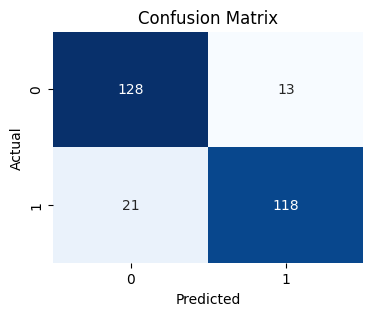

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#
confusion = confusion_matrix(y_test, y_pred)
# heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# LIME en modelo de clasificacion binaria

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=80de572dc12845867c8cde56eac1df09a0650bbe898df0314c834cef60294676
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")

# crear el explainer con el nombre d elas caracteristicas
explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=X_train.columns)

instance_idx = 59  # Elegir el registro a evaluar
instance = X_test.iloc[instance_idx]

# Explicacion de la prediccion
explanation = explainer.explain_instance(instance.values, rf_classifier.predict_proba, num_features=60)

# Display
explanation.show_in_notebook()
#explanation.as_list()
#explanation.as_pyplot_figure()

Accuracy of Random Forest Classifier: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Implementacion de LIME en un modelo de clasificacion de imagenes

## Importacion de las librerias necesarias

In [ ]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.13.1


## Usando el modelo inception

In [ ]:
inet_model = inc_net.InceptionV3()

def transform_img_fn(path_list):
    out = []
    img = image.load_img(path_list, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inc_net.preprocess_input(x)
    out.append(x)
    return np.vstack(out)

96112376/96112376 [==============================] - 2s 0us/step


## Veamos el top 5 de las predicciones de una imagen

In [ ]:
from google.colab import files
import cv2
from PIL import Image
uploaded = files.upload()
filename = next(iter(uploaded))
ImagenOriginal_Info = Image.open(filename)
ImagenOriginal = cv2.imread(filename)
ImagenOriginal = cv2.cvtColor(ImagenOriginal, cv2.COLOR_BGR2RGB)

Saving ososalmon.jpg to ososalmon.jpg


35363/35363 [==============================] - 0s 0us/step
('n02132136', 'brown_bear', 0.9325695)
('n02134418', 'sloth_bear', 0.0031168677)
('n02134084', 'ice_bear', 0.0016456912)
('n02133161', 'American_black_bear', 0.0015334395)
('n02509815', 'lesser_panda', 0.0009090225)


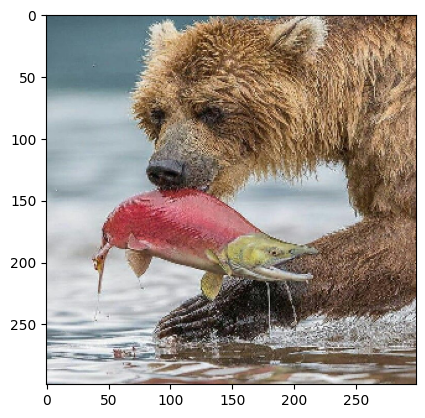

In [ ]:
images = transform_img_fn(filename)
# Se divide entre 2 y se suma 0.5 porque asi es como inception representa las imagenes
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## Explicacion

In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # Añade el directorio correspondiente
    import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

El atributo "hide_color" es el color para un superpíxel que está APAGADO. Alternativamente, si es "NONE", el superpíxel se reemplazará por el promedio de sus píxeles. Aquí, lo configuramos en 0 (en la representación utilizada por el modelo Inception, 0 significa gris).

In [ ]:
%%time
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step
CPU times: user 6min 41s, sys: 9.09 s, total: 6min 50s
Wall time: 5min 12s


## Explicación para la clase principal (Oso Negro).
Podemos ver los 5 superpíxeles principales que son más positivos hacia la clase, con el resto de la imagen oculta.

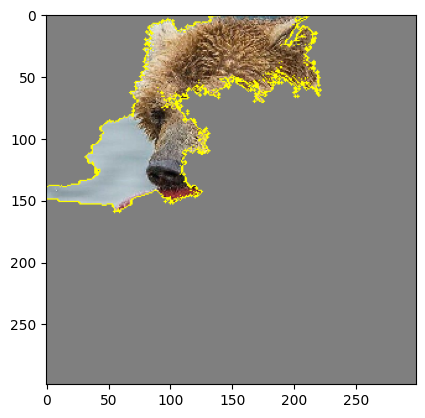

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

O con el resto de la imagen:

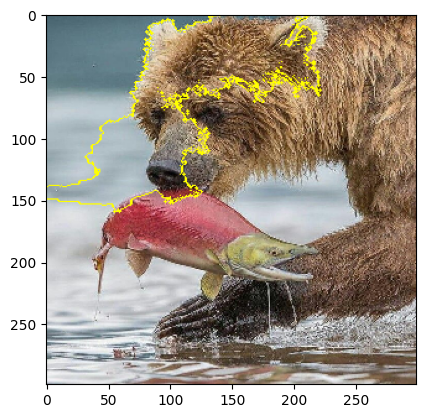

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

También podemos ver los "pros y contras" (pros en verde, contras en rojo)

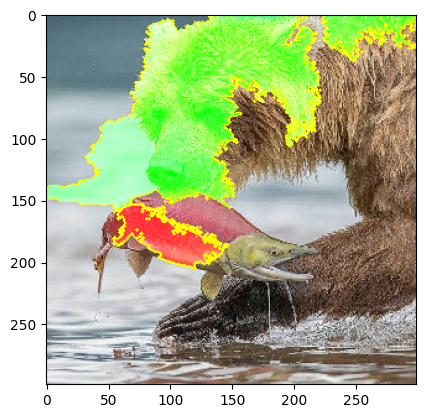

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

O los pros y contras que tienen un peso de al menos 0.1.

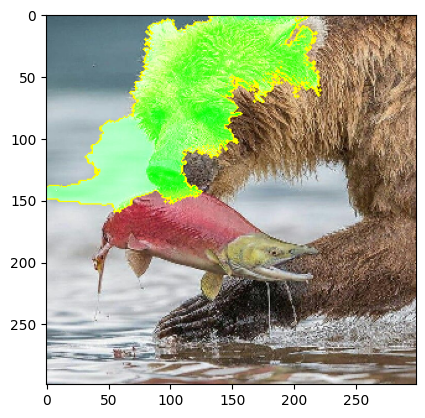

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Alternativamente, también podemos representar los pesos de la explicación en una visualización de mapa de calor. La barra de colores muestra los valores de los pesos.

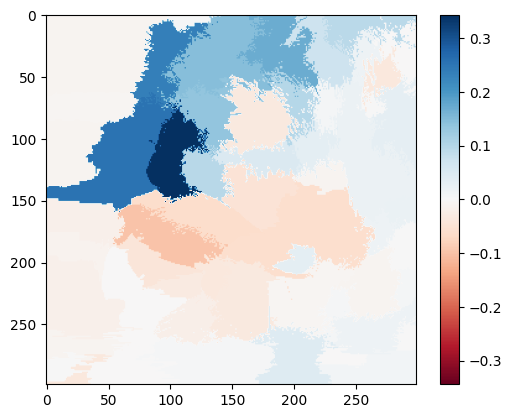

In [ ]:
#Selecciona la misma clase que se explica en las figuras anteriores.
ind =  explanation.top_labels[0]

#Mapea cada peso explicado con el superpixel correspondiente.
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#La visualización tiene más sentido si se utiliza una barra de colores simétrica.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()